# Equally weighted con 5 ETF

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

## Scarichiamo gli indici

In [ ]:
urlo = "https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/DAILY/NET/EUR/"

elenco = pd.read_excel("https://www.paolocoletti.com/wp-content/uploads/youtube/etfs_with_msci.xlsx" , sheet_name="selezionati" , index_col=0)
elenco["url"] = urlo + elenco["Path"] + "/" + elenco["File"] + ".csv"
elenco["url"] = elenco["url"].str.replace("\\","/")
elenco

,Path,File,url
MSCI index,,,
WORLD,DEVELOPED-MARKETS-DM\Region\NONE\NONE\STANDARD...,WORLD,https://raw.githubusercontent.com/paolocole/St...
EMERGING MARKETS IMI,EMERGING-MARKETS-EM\Region\NONE\NONE\IMI-LARGE...,EM-EMERGING-MARKETS-IMI,https://raw.githubusercontent.com/paolocole/St...
ACWI,ALL-COUNTRY-DM-EM\Region\NONE\NONE\STANDARD-LA...,ACWI,https://raw.githubusercontent.com/paolocole/St...
EUROPE,DEVELOPED-MARKETS-DM\Region\NONE\NONE\STANDARD...,EUROPE,https://raw.githubusercontent.com/paolocole/St...
USA,DEVELOPED-MARKETS-DM\Country\NONE\NONE\STANDAR...,USA,https://raw.githubusercontent.com/paolocole/St...
EMERGING MARKETS,EMERGING-MARKETS-EM\Region\NONE\NONE\STANDARD-...,EM-EMERGING-MARKETS,https://raw.githubusercontent.com/paolocole/St...
JAPAN IMI,DEVELOPED-MARKETS-DM\Country\NONE\NONE\IMI-LAR...,JAPAN-IMI,https://raw.githubusercontent.com/paolocole/St...
INDIA,EMERGING-MARKETS-EM\Country\NONE\NONE\STANDARD...,INDIA,https://raw.githubusercontent.com/paolocole/St...
WORLD SMALL CAP,DEVELOPED-MARKETS-DM\Region\NONE\NONE\SMALL-CAP,WORLD-SMALL-CAP,https://raw.githubusercontent.com/paolocole/St...


In [3]:
dati = pd.DataFrame()
for nome in elenco.index:
    print(nome, end=" - ")
    df = pd.read_csv(elenco.loc[nome,"url"], index_col=0)
    df.index = pd.to_datetime(df.index)
#    df.dropna(inplace=True)
    dati = pd.concat([dati,df], axis=1)
dati = dati.resample('ME',label="right").last().to_period("M")

WORLD - EMERGING MARKETS IMI - ACWI - EUROPE - USA - EMERGING MARKETS - JAPAN IMI - INDIA - WORLD SMALL CAP - EMU - JAPAN - CHINA - EM ASIA - PACIFIC EX JAPAN - BRAZIL - EUROPE SMALL CAP - CHINA A - EM EX-CHINA - UK - WORLD EX USA - EUROPE EX-UK - NORDIC - CANADA - NORTH AMERICA - EMU SMALL CAP - AC FAR EAST EX-JAPAN - WORLD EX EMU - WORLD EX EUROPE - TAIWAN - SAUDI ARABIA CAPPED - EM LATIN AMERICA - MEXICO - AUSTRALIA - JAPAN SMALL CAP - SWITZERLAND - AC ASIA EX JAPAN - EASTERN EUROPE EX RUSSIA - KOREA - UK SMALL CAP - SINGAPORE - SOUTH AFRICA - FRANCE - POLAND - GREECE - INDONESIA - TURKEY - 

In [4]:
dati

,WORLD,EM (EMERGING MARKETS) IMI,ACWI,EUROPE,USA,EM (EMERGING MARKETS),JAPAN IMI,INDIA,WORLD SMALL CAP,EMU,...,EM EASTERN EUROPE ex RUSSIA,KOREA,UNITED KINGDOM SMALL CAP,SINGAPORE,SOUTH AFRICA,FRANCE,POLAND,GREECE,INDONESIA,TURKEY
Date,,,,,,,,,,,,,,,,,,,,,
1998-12,NaN,306.018626,NaN,NaN,NaN,NaN,674.664782,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01,NaN,300.452653,NaN,NaN,NaN,NaN,701.501065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02,NaN,314.834029,NaN,NaN,NaN,NaN,712.373660,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03,NaN,363.181279,NaN,NaN,NaN,NaN,826.510764,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04,NaN,417.263244,NaN,NaN,NaN,NaN,887.305331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,580.070418,2178.343068,413.429222,336.010492,743.482912,520.321700,2225.637425,1132.227070,641.469038,296.325008,...,3577.982606,627.195835,428.247946,725.787247,502.436991,359.871389,182.957187,10.358455,1432.866230,202.298077
2025-01,598.200629,2194.157878,425.641619,357.746666,762.948220,527.556603,2252.977122,1087.716727,661.113232,317.855992,...,4005.576261,664.054380,436.600393,755.885069,527.013199,387.332308,206.942386,11.124297,1412.898251,204.737508
2025-02,593.638280,2194.227295,422.894336,370.728727,750.345351,529.883063,2225.667587,1000.070515,638.934564,328.824982,...,4251.967663,661.665391,428.979792,776.471230,529.633672,395.398108,223.830147,11.573253,1188.482334,195.207657


In [5]:
rendimenti = dati.pct_change(fill_method=None)

### Funzioni di utilità

In [6]:
# poco efficiente
def portfolio_yearly_returns(which,months): # non ribilanciato!
    rendimenti = []
    for i in range(len(dati.index)-months):
        validi = len(which) - ( dati[which].iloc[i] * dati[which].iloc[i+months] ).isna().sum()
        if validi > 0:
            quote = (100 / validi) / dati[which].iloc[i]
            montante = (quote * dati[which].iloc[i + months]).sum()
            if montante != np.nan: rendimenti.append( ( montante/100 ) )
    return np.array(rendimenti).mean()**(12/months) -1 , np.array(rendimenti).std(), len(rendimenti)

In [7]:
def portfolio_yearly_returns(which,months): # non ribilanciato!
    rendimenti = []
    for i in range(len(dati.index)-months):
        if ( dati[which].iloc[i].isna() | dati[which].iloc[i+months].isna() ).sum() < len(which):
            rendimenti.append( ( dati[which].iloc[i + months] / dati[which].iloc[i] ).mean() )
    return np.array(rendimenti).mean()**(12/months) -1 , np.array(rendimenti).std(), len(rendimenti)

In [8]:
# ancora più ottimizzato!
def portfolio_yearly_returns(which,months): # non ribilanciato!
    rendimenti = ( dati[which] / dati[which].shift(months) ).mean(axis=1)
    return ( rendimenti.mean(axis=0)**(12/months) -1 )  , rendimenti.std(axis=0), rendimenti.count().sum() 

#ESEMPIO DI FUNZIONAMENTO DEL CODICE:

# Supponiamo di avere il seguente DataFrame chiamato 'dati':
#
#           ITA   USA   FRA
# 2020-01   100   100   100
# 2020-02   105   102   103
# 2020-03   107   104   106
# 2020-04   106   108   108
#
# Eseguiamo la funzione:
# >>> portfolio_yearly_returns(["ITA", "USA", "FRA"], months=1)
#
# 1. Calcolo dei rendimenti grezzi: (dati[which] / dati[which].shift(1))
#    - 2020-02: [105/100, 102/100, 103/100] = [1.05, 1.02, 1.03]
#    - 2020-03: [107/105, 104/102, 106/103] ≈ [1.0190, 1.0196, 1.0291]
#    - 2020-04: [106/107, 108/104, 108/106] ≈ [0.9916, 1.0385, 1.0189]
#
# 2. Media tra asset (mean(axis=1)) → rendimento medio mensile del portafoglio:
#    - 2020-02: (1.05 + 1.02 + 1.03)/3 ≈ 1.0333
#    - 2020-03: (1.0190 + 1.0196 + 1.0291)/3 ≈ 1.0226
#    - 2020-04: (0.9916 + 1.0385 + 1.0189)/3 ≈ 1.0163
#
# 3. Media nel tempo (rendimenti.mean()):
#    - (1.0333 + 1.0226 + 1.0163)/3 ≈ 1.0241
#
# 4. Annualizzazione (rendimenti.mean()**12 - 1):
#    - 1.0241 ** 12 - 1 ≈ 0.3287 → rendimento annuo = 32.87%
#
# 5. Deviazione standard (rendimenti.std()):
#    - std([1.0333, 1.0226, 1.0163]) → volatilità
#
# 6. Numero di osservazioni (rendimenti.count().sum()):
#    - 3 osservazioni valide (3 mesi)

# Risultato finale:
# → rendimento annuo ≈ 32.87%
# → volatilità ≈ deviazione standard dei rendimenti mensili
# → osservazioni = 3

In [9]:
portfolio_yearly_returns(["POLAND","GREECE","TURKEY","CHINA A","BRAZIL"],12)  # (0.08327308316346159, 0.277029684889988, 276)

(np.float64(0.08274484530853021),
 np.float64(0.2746435797616533),
 np.int64(281))

## Semplifichiamo basandoci sulle correlazioni

<Axes: >

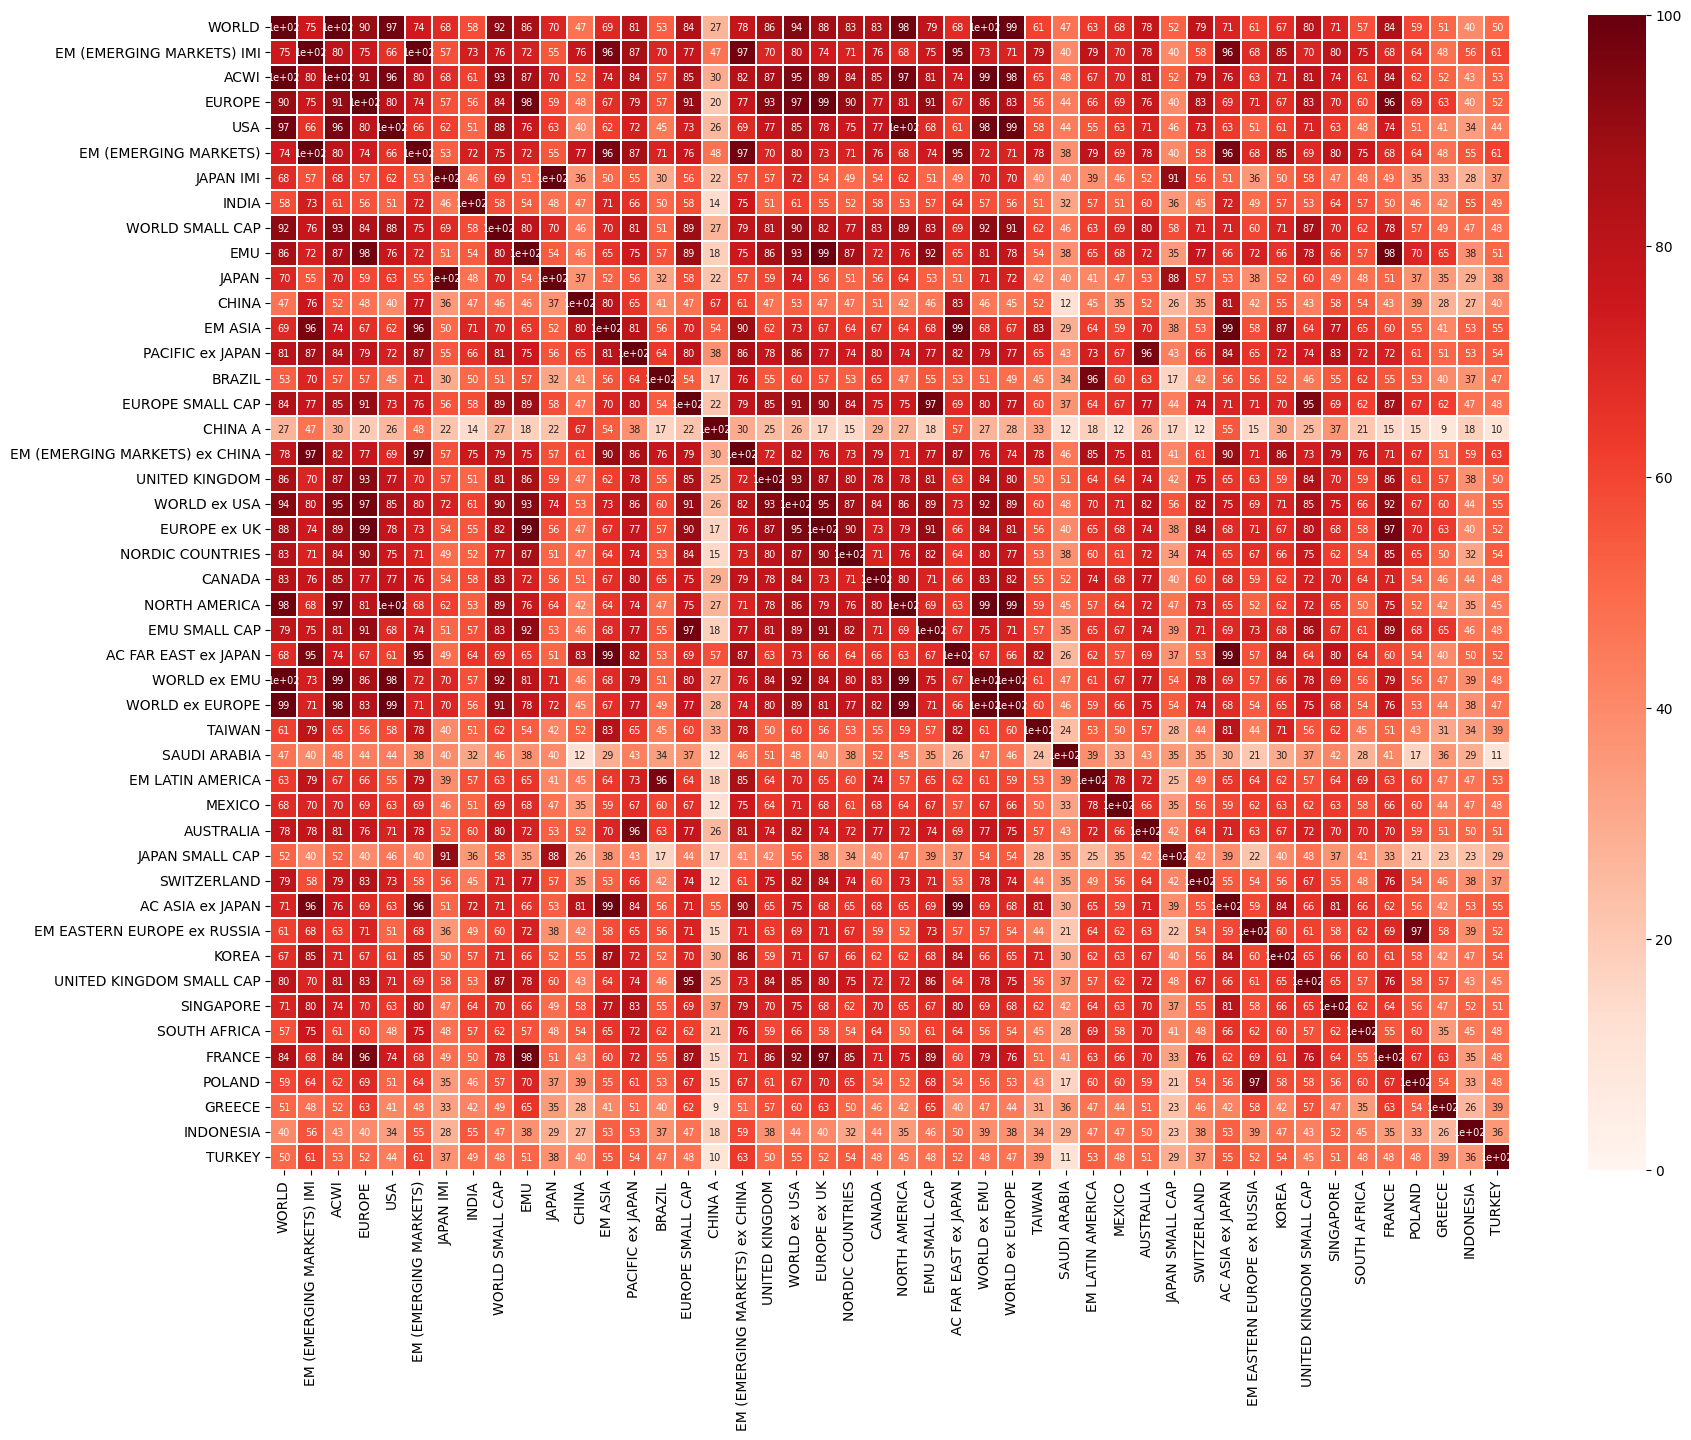

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(round(rendimenti.corr()*100,0), cmap="Reds", linewidths=0.1,annot=True, vmin=0, vmax=100, annot_kws={"size": 7})

In [11]:
eliminati2 = ["ACWI","USA","NORTH AMERICA","WORLD ex EMU", "WORLD ex EUROPE", "EM (EMERGING MARKETS)", "EM ASIA",
             "EM (EMERGING MARKETS) ex CHINA", "EM ASIA", "AC FAR EAST ex JAPAN", "AC ASIA ex JAPAN", "EMU", "WORLD ex USA",
             "EUROPE ex UK", "FRANCE", "JAPAN", "EM LATIN AMERICA", "EMU SMALL CAP", "AUSTRALIA", "UNITED KINGDOM SMALL CAP", "POLAND"]

In [12]:
dati2 = dati.drop(columns=eliminati2)
rendimenti2 = rendimenti.drop(columns=eliminati2)

<Axes: >

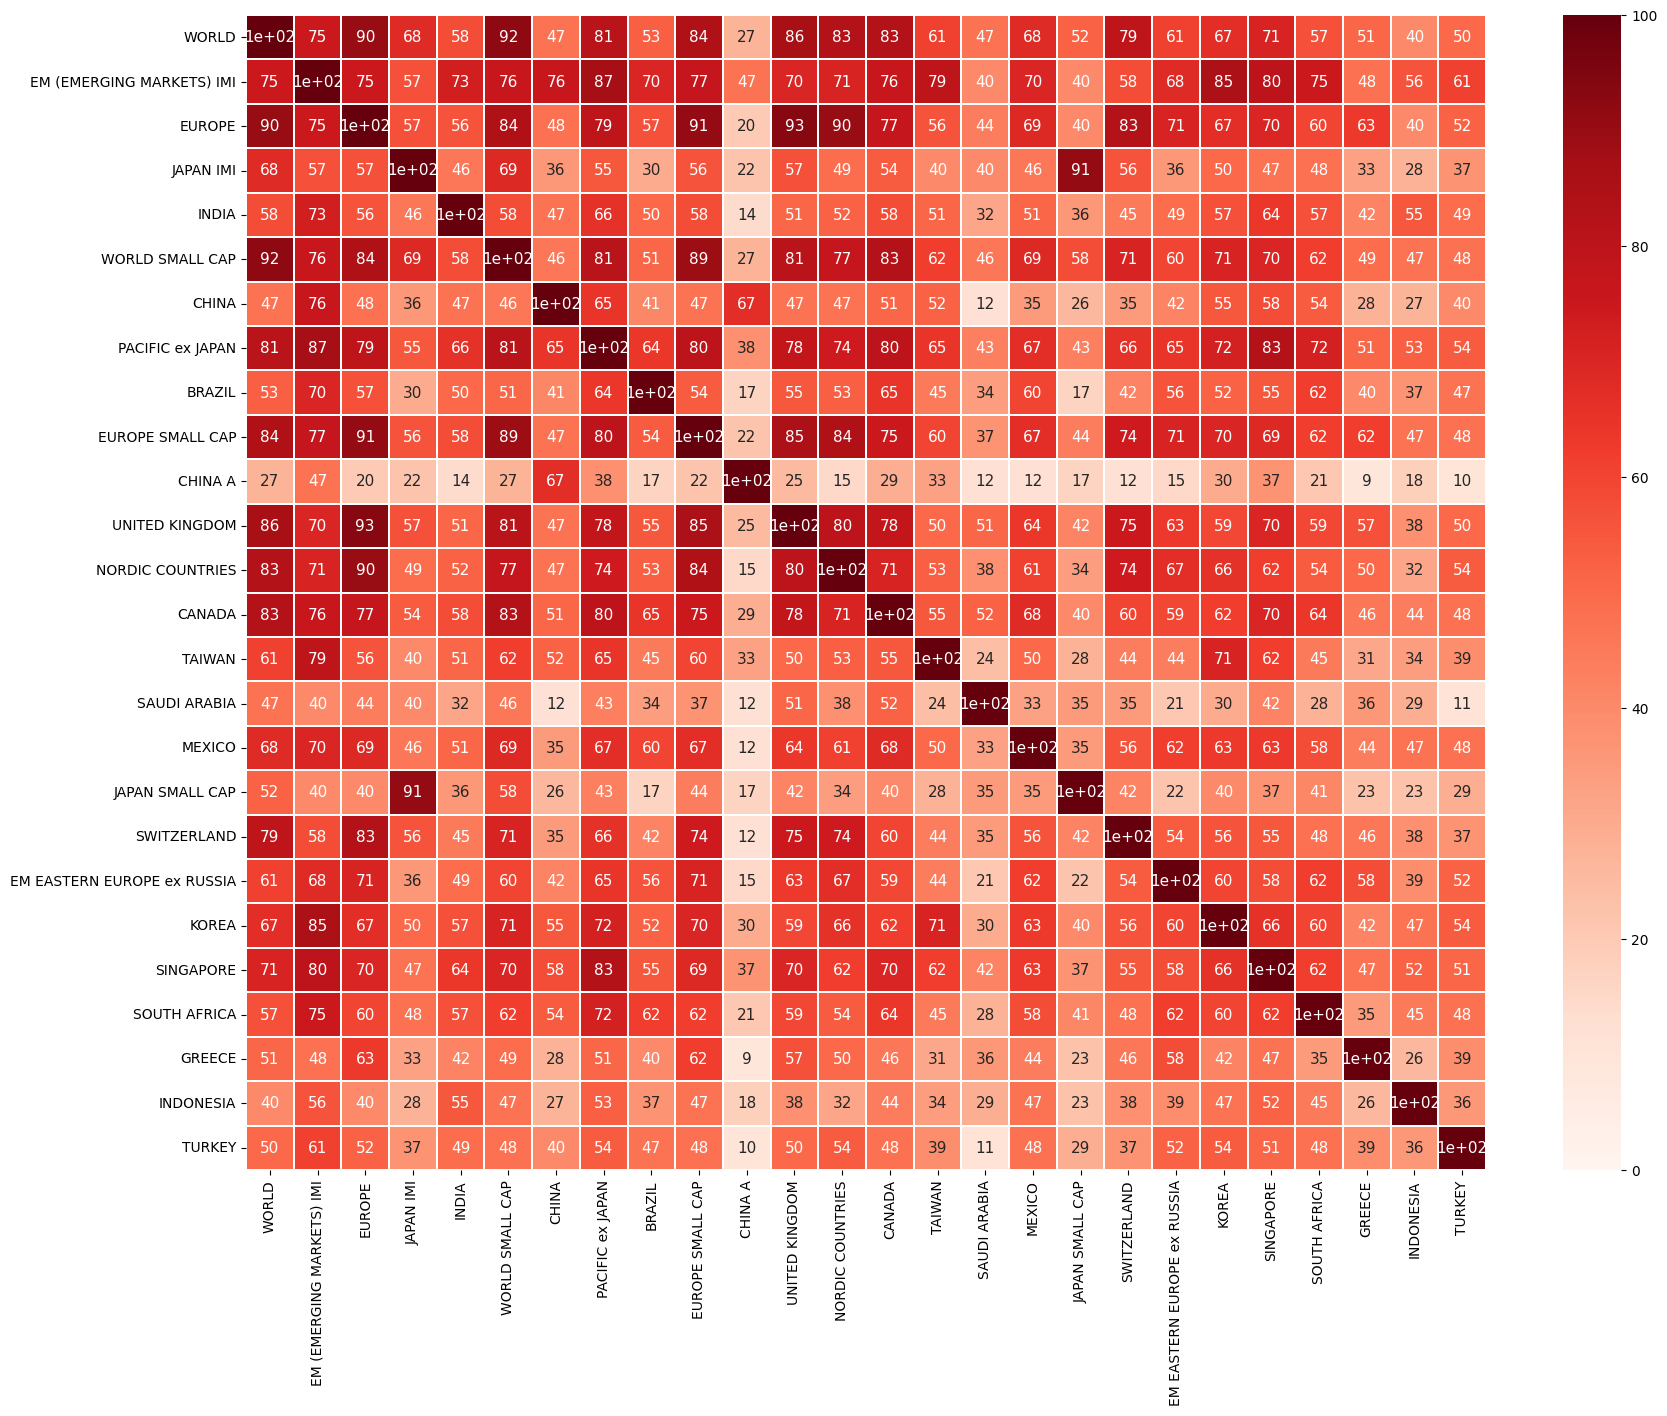

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(round(rendimenti2.corr()*100,0), cmap="Reds", linewidths=0.1,annot=True, vmin=0, vmax=100, annot_kws={"size": 11})

## Faccio tutte le combinazioni

In [14]:
mesi = 60

In [15]:
# faccio tutte le combinazioni
from itertools import combinations
c = combinations(dati2.columns,5)

In [16]:
r = []
i = []
for k in c:
    kk = list(k)
    # print(kk)
    i.append(str(kk))
    r.append(portfolio_yearly_returns(kk,mesi))
    if len(i)%1000==0: print(len(i), end=" ")
results = pd.DataFrame(r,index=i,columns=["return","vol","valid"])
results["Sharpetti"] = results["return"]/results["vol"]

1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 

<Axes: xlabel='vol', ylabel='return'>

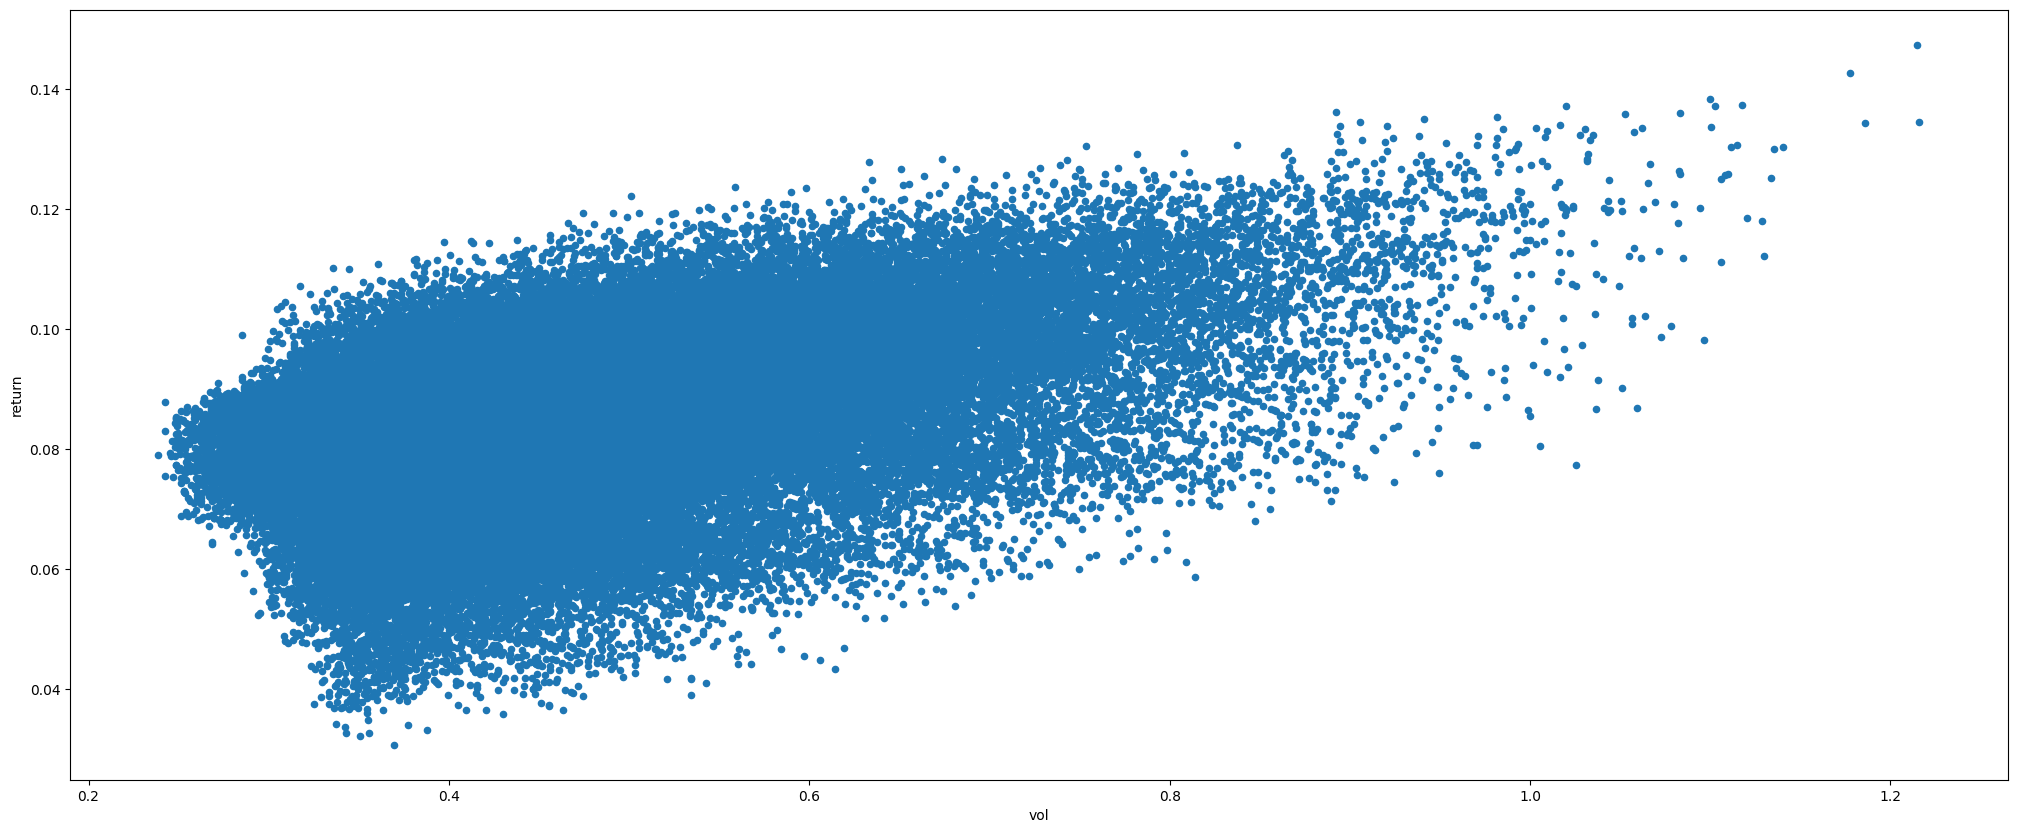

In [17]:
results.plot(kind="scatter",y="return",x="vol",figsize=(25,10))

In [18]:
results["return"].idxmax(),results["return"].max(),results.loc[results["return"].idxmax(),"vol"]

("['INDIA', 'BRAZIL', 'CHINA A', 'SAUDI ARABIA', 'INDONESIA']",
 np.float64(0.14740397299259733),
 np.float64(1.2148674713760288))

In [19]:
results.nsmallest(columns="vol",n=10)

,return,vol,valid,Sharpetti
"['CHINA A', 'CANADA', 'TAIWAN', 'JAPAN SMALL CAP', 'SINGAPORE']",0.078957,0.238592,233,0.330930
"['CHINA A', 'CANADA', 'JAPAN SMALL CAP', 'SWITZERLAND', 'SINGAPORE']",0.075532,0.242321,233,0.311701
"['CHINA A', 'CANADA', 'TAIWAN', 'SWITZERLAND', 'SINGAPORE']",0.082945,0.242465,233,0.342092
"['CHINA A', 'TAIWAN', 'SAUDI ARABIA', 'SWITZERLAND', 'SOUTH AFRICA']",0.087801,0.242510,233,0.362049
"['WORLD', 'CHINA A', 'CANADA', 'SWITZERLAND', 'SINGAPORE']",0.079388,0.244964,233,0.324082
"['CHINA A', 'UNITED KINGDOM', 'TAIWAN', 'SWITZERLAND', 'SOUTH AFRICA']",0.078827,0.245709,233,0.320814
"['CANADA', 'TAIWAN', 'JAPAN SMALL CAP', 'SWITZERLAND', 'SINGAPORE']",0.081274,0.246507,233,0.329702
"['WORLD', 'CHINA A', 'CANADA', 'JAPAN SMALL CAP', 'SINGAPORE']",0.075347,0.246980,233,0.305073
"['CHINA A', 'TAIWAN', 'JAPAN SMALL CAP', 'SWITZERLAND', 'SOUTH AFRICA']",0.081291,0.247460,233,0.328501
"['PACIFIC ex JAPAN', 'CHINA A', 'TAIWAN', 'SWITZERLAND', 'SINGAPORE']",0.084297,0.247789,233,0.340197


In [20]:
results.nlargest(columns="Sharpetti",n=10)

,return,vol,valid,Sharpetti
"['CHINA A', 'TAIWAN', 'SAUDI ARABIA', 'SWITZERLAND', 'SOUTH AFRICA']",0.087801,0.242510,233,0.362049
"['WORLD', 'TAIWAN', 'JAPAN SMALL CAP', 'SWITZERLAND', 'INDONESIA']",0.099043,0.285305,233,0.347148
"['CHINA A', 'TAIWAN', 'SWITZERLAND', 'SINGAPORE', 'SOUTH AFRICA']",0.085354,0.248475,233,0.343514
"['PACIFIC ex JAPAN', 'CHINA A', 'TAIWAN', 'SWITZERLAND', 'SOUTH AFRICA']",0.086310,0.251460,233,0.343235
"['WORLD', 'CHINA A', 'TAIWAN', 'SINGAPORE', 'SOUTH AFRICA']",0.085176,0.248394,233,0.342908
"['CHINA A', 'CANADA', 'TAIWAN', 'SWITZERLAND', 'SOUTH AFRICA']",0.084968,0.248340,233,0.342144
"['CHINA A', 'CANADA', 'TAIWAN', 'SWITZERLAND', 'SINGAPORE']",0.082945,0.242465,233,0.342092
"['WORLD', 'CHINA A', 'TAIWAN', 'SAUDI ARABIA', 'SOUTH AFRICA']",0.086983,0.254588,233,0.341663
"['PACIFIC ex JAPAN', 'CHINA A', 'TAIWAN', 'SWITZERLAND', 'SINGAPORE']",0.084297,0.247789,233,0.340197
"['WORLD', 'CHINA A', 'TAIWAN', 'SWITZERLAND', 'SOUTH AFRICA']",0.085067,0.250481,233,0.339614


#### Paragono minor volatilità con MSCI WORLD

In [21]:
which_string = results["vol"].idxmin()[1:-1].replace("'","")
which = which_string.split(", ")
which

['CHINA A', 'CANADA', 'TAIWAN', 'JAPAN SMALL CAP', 'SINGAPORE']

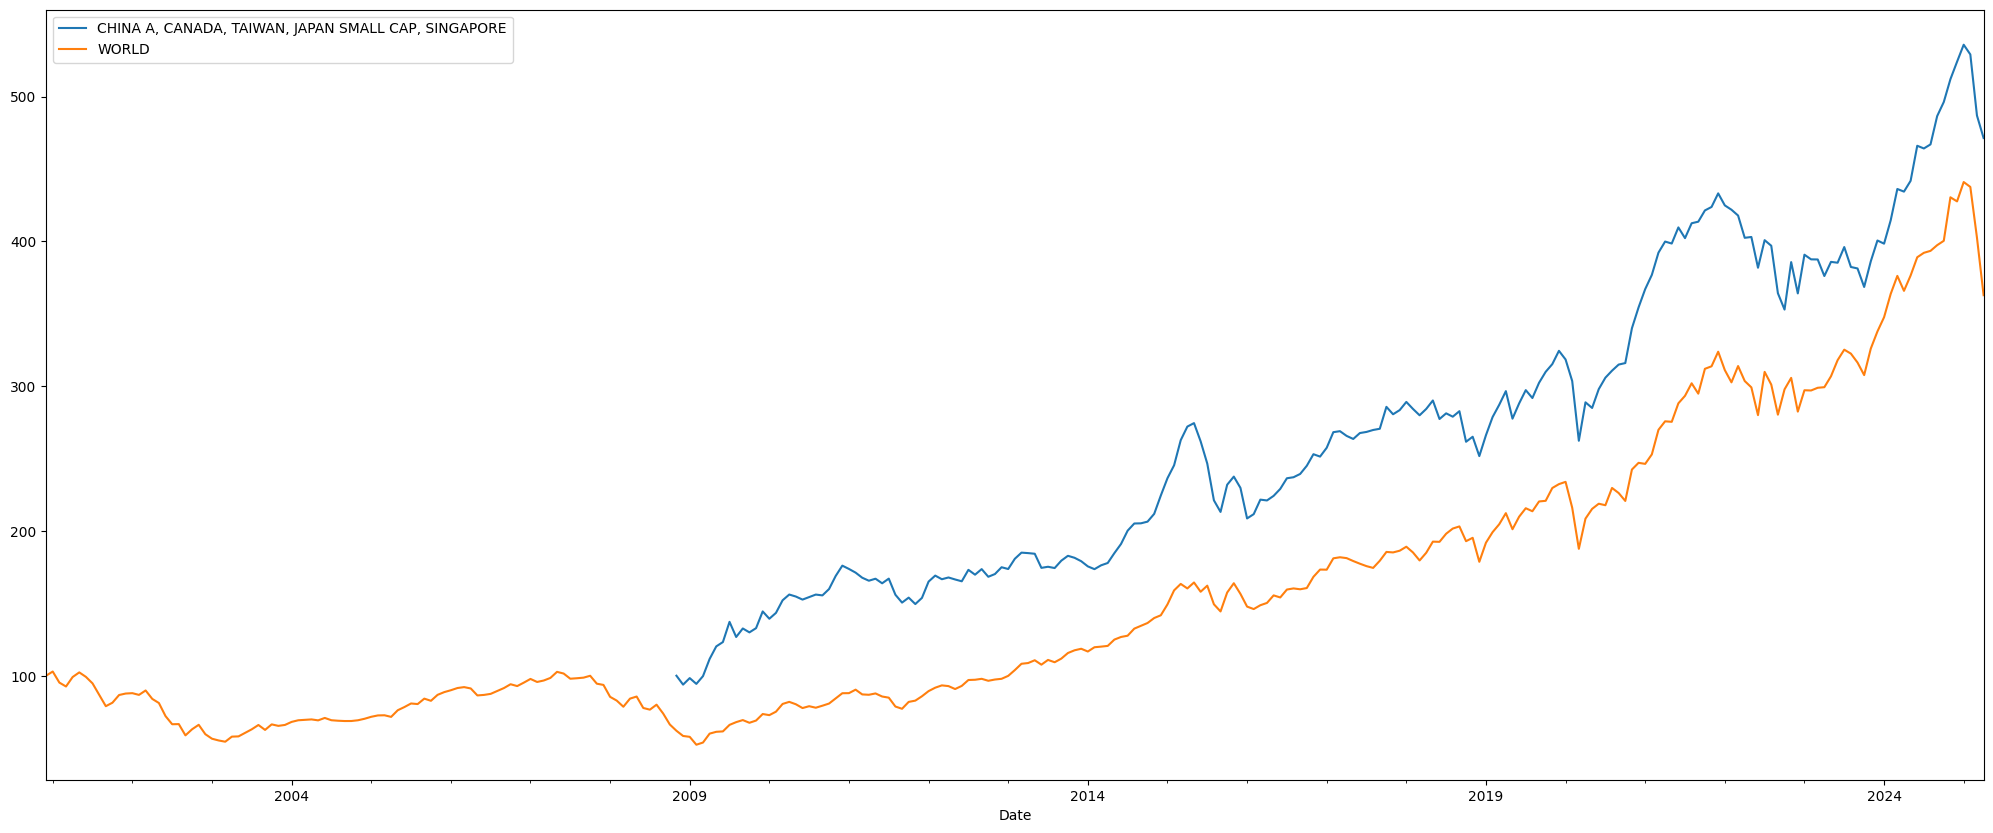

In [22]:
temp = dati2[which].dropna()
(100*temp/temp.iloc[0]).mean(axis=1).plot(figsize=(25,10),label=which_string)
(100*dati2["WORLD"].dropna()/dati2["WORLD"].dropna().iloc[0]).plot(figsize=(25,10))
plt.legend()

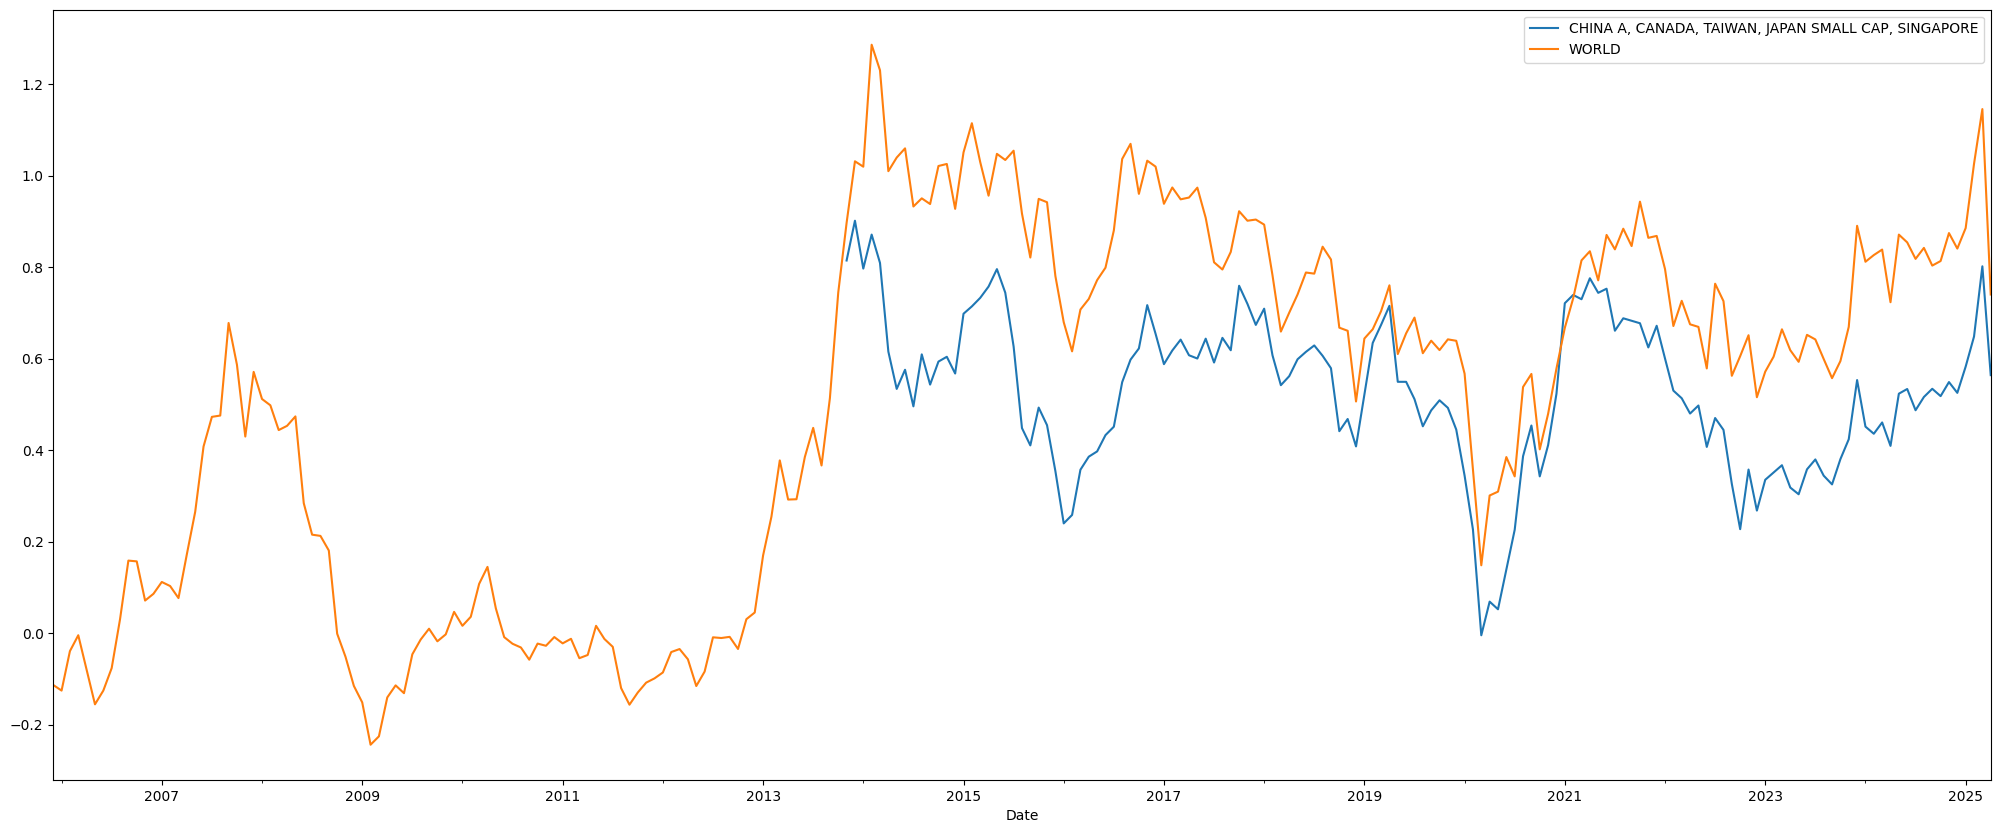

In [23]:
temp = dati2[which].dropna()
temp.pct_change(mesi,fill_method=None).mean(axis=1).dropna().plot(figsize=(25,10),label=which_string)
dati2["WORLD"].pct_change(mesi,fill_method=None).dropna().plot(figsize=(25,10))
plt.legend()

In [24]:
print(which_string)
display(temp.pct_change(mesi,fill_method=None).mean(axis=1).describe())
print("\nWORLD")
display(dati2["WORLD"].pct_change(mesi,fill_method=None).describe())

CHINA A, CANADA, TAIWAN, JAPAN SMALL CAP, SINGAPORE


count    138.000000
mean       0.528701
std        0.167329
min       -0.004649
25%        0.425953
50%        0.537946
75%        0.639635
max        0.901353
dtype: float64


WORLD


count    233.000000
mean       0.502997
std        0.397465
min       -0.243890
25%        0.071176
50%        0.609905
75%        0.834592
max        1.285969
Name: WORLD, dtype: float64

#### Paragono maggior Sharpetti con MSCI WORLD

In [25]:
which_string = results["Sharpetti"].idxmax()[1:-1].replace("'","")
which = which_string.split(", ")
which

['CHINA A', 'TAIWAN', 'SAUDI ARABIA', 'SWITZERLAND', 'SOUTH AFRICA']

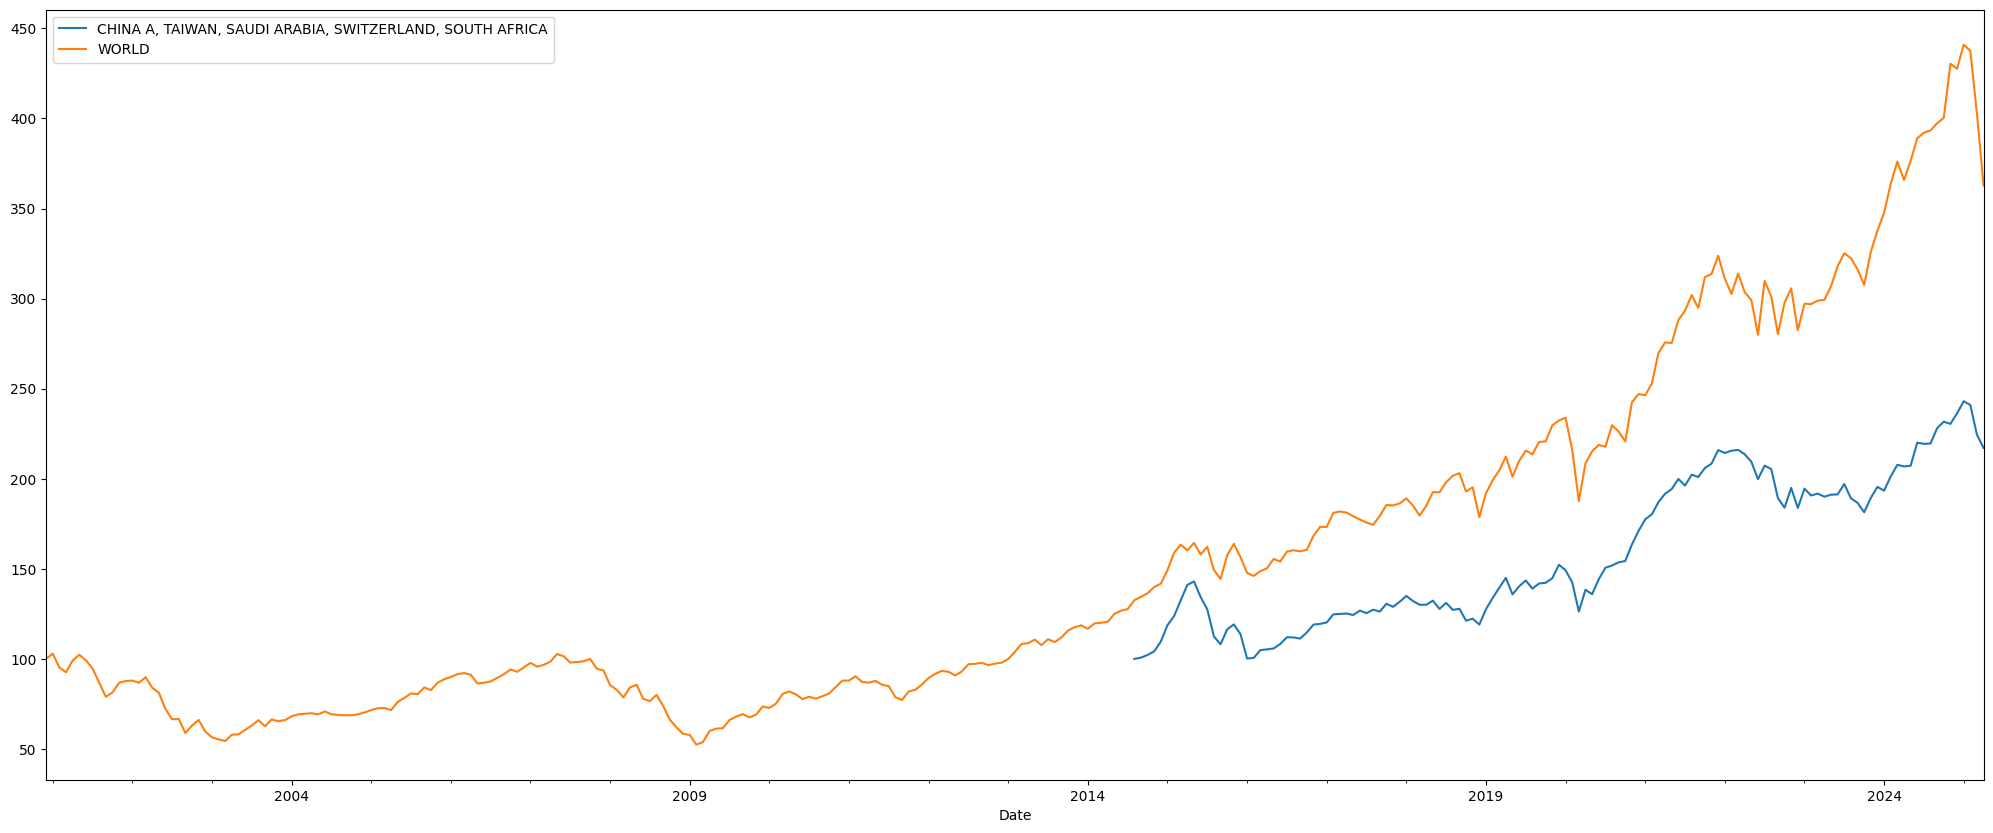

In [26]:
temp = dati2[which].dropna()
(100*temp/temp.iloc[0]).mean(axis=1).plot(figsize=(25,10),label=which_string)
(100*dati2["WORLD"].dropna()/dati2["WORLD"].dropna().iloc[0]).plot(figsize=(25,10))
plt.legend()

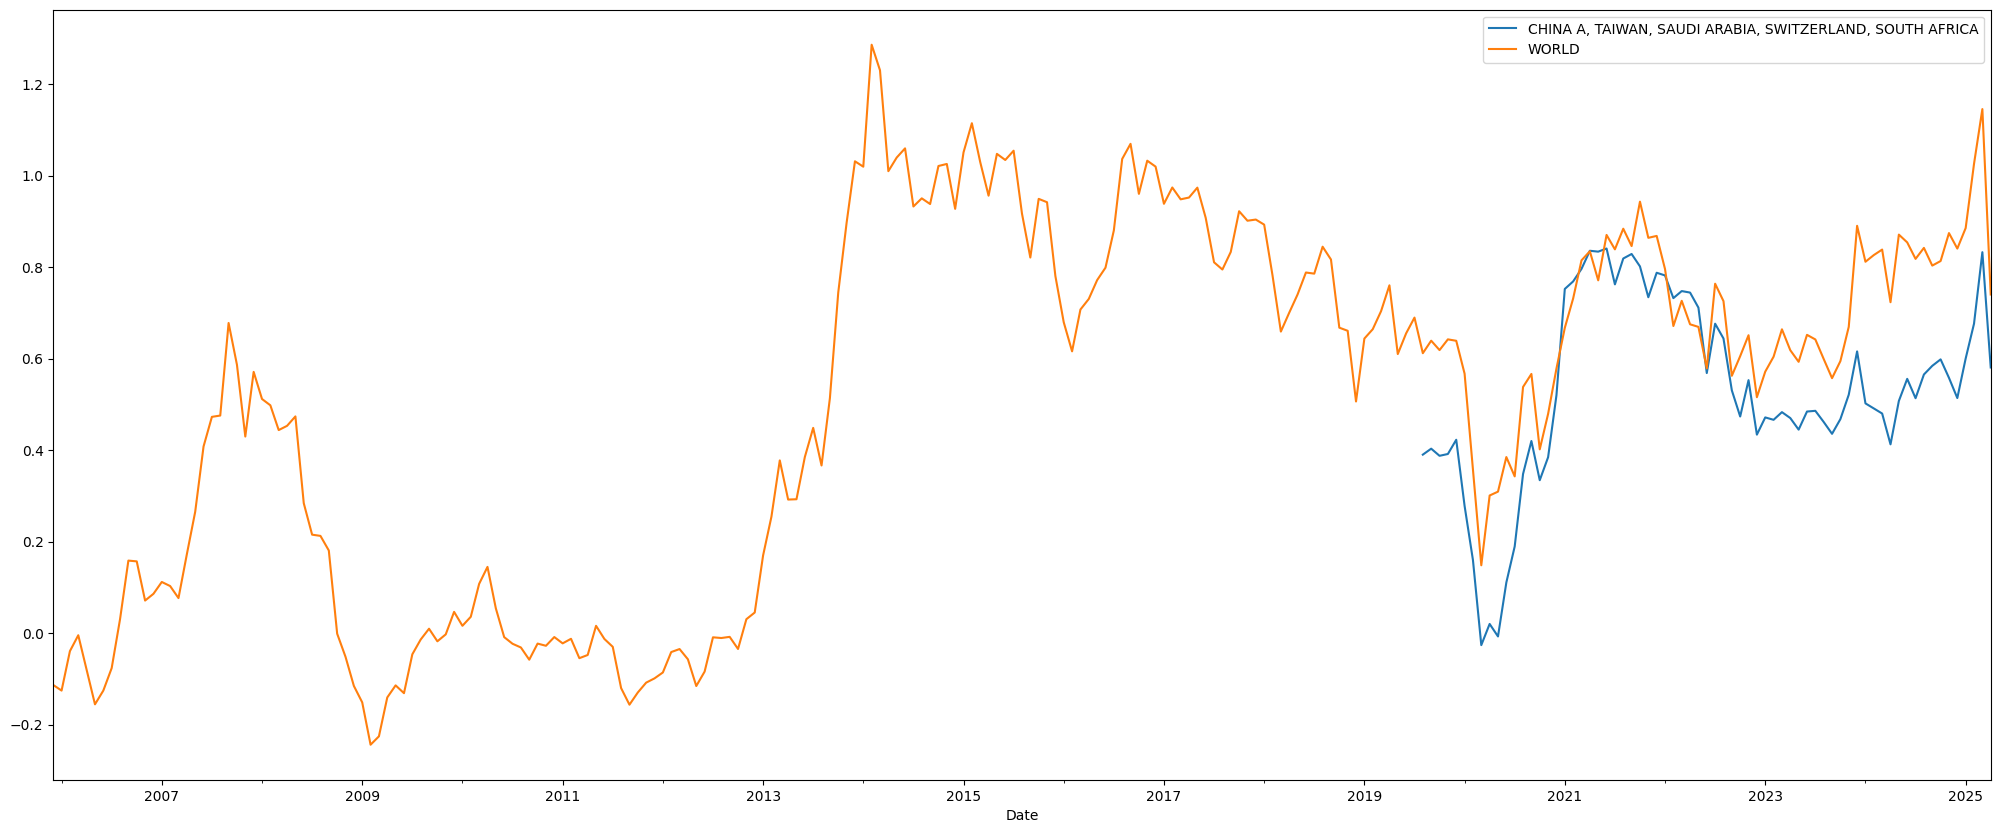

In [27]:
temp = dati2[which].dropna()
temp.pct_change(mesi,fill_method=None).mean(axis=1).dropna().plot(figsize=(25,10),label=which_string)
dati2["WORLD"].pct_change(mesi,fill_method=None).dropna().plot(figsize=(25,10))
plt.legend()

In [28]:
print(which_string)
display(temp.pct_change(mesi,fill_method=None).mean(axis=1).describe())
print("\nWORLD")
display(dati2["WORLD"].pct_change(mesi,fill_method=None).describe())

CHINA A, TAIWAN, SAUDI ARABIA, SWITZERLAND, SOUTH AFRICA


count    69.000000
mean      0.531312
std       0.206102
min      -0.026223
25%       0.433813
50%       0.513786
75%       0.711353
max       0.840603
dtype: float64


WORLD


count    233.000000
mean       0.502997
std        0.397465
min       -0.243890
25%        0.071176
50%        0.609905
75%        0.834592
max        1.285969
Name: WORLD, dtype: float64

## Algoritmo genetico (universitario)

In [29]:
len(dati2.columns)

26

In [30]:
# creo i portafogli iniziali
portafogli = []
for i in range(0,len(dati2.columns),5):
    portafogli.append(dati2.columns[i:i+5])
if i < len(dati2.columns):
    # se l'ultimo è incompleto aggiungo
    for k in range(0,5 - (len(dati2.columns)-i)):
        portafogli[-1] = portafogli[-1].append(dati2.columns[k:k+1])
else:
    # altrimenti comunque aggiorno k perché magari lo uso dopo
    k = -1
if len(portafogli)%2 == 1:
    # se sono dispari ne creo un altro
    portafogli.append(dati2.columns[k+1:k+6])
portafogli

[Index(['WORLD', 'EM (EMERGING MARKETS) IMI', 'EUROPE', 'JAPAN IMI', 'INDIA'], dtype='object'),
 Index(['WORLD SMALL CAP', 'CHINA', 'PACIFIC ex JAPAN', 'BRAZIL',
        'EUROPE SMALL CAP'],
       dtype='object'),
 Index(['CHINA A', 'UNITED KINGDOM', 'NORDIC COUNTRIES', 'CANADA', 'TAIWAN'], dtype='object'),
 Index(['SAUDI ARABIA', 'MEXICO', 'JAPAN SMALL CAP', 'SWITZERLAND',
        'EM EASTERN EUROPE ex RUSSIA'],
       dtype='object'),
 Index(['KOREA', 'SINGAPORE', 'SOUTH AFRICA', 'GREECE', 'INDONESIA'], dtype='object'),
 Index(['TURKEY', 'WORLD', 'EM (EMERGING MARKETS) IMI', 'EUROPE', 'JAPAN IMI'], dtype='object')]

In [31]:
# incrocio i portafogli, adesso che so che sono tutti completi e sono in numero pari
# for i in range(0,len(portafogli),2):



# Prendere i dati da JUSTETF

In [32]:
import json
import requests
import urllib.parse

ModuleNotFoundError: No module named 'requests'

In [ ]:
!pip install justetf-scraping[all]@git+https://github.com/druzsan/justetf-scraping.git

  Cloning https://github.com/druzsan/justetf-scraping.git to /tmp/pip-install-n7opivwf/justetf-scraping_fb33eadc6f5341929874af142a22d921
  Running command git clone --filter=blob:none --quiet https://github.com/druzsan/justetf-scraping.git /tmp/pip-install-n7opivwf/justetf-scraping_fb33eadc6f5341929874af142a22d921
  Resolved https://github.com/druzsan/justetf-scraping.git to commit 0ee042e56fae7d7e7f82749a438472ad26386abb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import justetf_scraping

In [ ]:
etfs = justetf_scraping.load_overview()
etfs

/usr/local/lib/python3.11/dist-packages/justetf_scraping/overview.py:406: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
/usr/local/lib/python3.11/dist-packages/justetf_scraping/overview.py:406: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")


,wkn,ticker,valor,name,inception_date,age_in_days,age_in_years,strategy,domicile_country,currency,...,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown
isin,,,,,,,,,,,,,,,,,,,,,
IE00B5BMR087,A0YEDG,SXR8,10737041,iShares Core S&P 500 UCITS ETF USD (Acc),2010-05-19,5422,14.854795,Long-only,Ireland,USD,...,15.43,17.83,18.80,0.64,0.58,1.11,-33.71,-13.35,-15.92,-17.11
IE00B4L5Y983,A0RPWH,EUNL,10608388,iShares Core MSCI World UCITS ETF USD (Acc),2009-09-25,5658,15.501370,Long-only,Ireland,USD,...,13.34,15.05,16.01,0.72,0.63,1.19,-33.91,-11.29,-15.01,-16.88
IE00B3XXRP09,A1JX53,VUSA,18575508,Vanguard S&P 500 UCITS ETF (USD) Distributing,2012-05-22,4688,12.843836,Long-only,Ireland,USD,...,15.63,18.04,18.91,0.61,0.56,1.10,-33.70,-13.35,-16.10,-17.28
IE00B3YCGJ38,A1CYW7,P500,11358996,Invesco S&P 500 UCITS ETF,2010-05-20,5421,14.852055,Long-only,Ireland,USD,...,15.45,17.88,18.85,0.62,0.58,1.12,-33.69,-13.34,-16.06,-17.20
IE00BKM4GZ66,A111X9,IS3N,24209517,iShares Core MSCI Emerging Markets IMI UCITS E...,2014-05-30,3950,10.821918,Long-only,Ireland,USD,...,13.51,13.46,14.97,0.75,0.29,0.70,-34.34,-10.36,-17.53,-23.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XS2427363036,A3GWVS,2FLY,<NA>,WisdomTree STOXX Europe Travel & Leisure 2x Da...,2022-03-02,1117,3.060274,Short & Leveraged,Ireland,EUR,...,33.31,42.83,NaN,-0.53,0.08,NaN,-42.03,-36.10,-41.91,NaN
JE00B24DKJ77,A0V6Y0,4RTE,<NA>,WisdomTree Nickel 1x Daily Short,2008-02-22,6239,17.093151,Short & Leveraged,Jersey,USD,...,25.36,46.61,49.42,0.54,0.54,-0.54,-96.99,-23.84,-47.83,-89.44
XS2842095759,<NA>,3SBB,<NA>,GraniteShares 3x Short Alibaba Daily ETP,2022-02-02,1145,3.136986,Short & Leveraged,Ireland,USD,...,132.24,147.11,NaN,-0.72,-0.56,NaN,-99.90,-96.62,-99.72,NaN
